In [1]:
#Lab 3: normalisation and feature engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting

In [21]:
data=pd.read_csv('test_data9.csv')
data.head()

,Id,ParentId,UUID,SomeString,SomeUrl,SomeEmail,SomeLat,SomeLon,SomeInt,SomeReal,SomeDate,SomeBoolean,SomeCountry,MixedStringNumber
0,1,62.0,123e4567-e89b-12d3-a456-426655440000,abcdef,http://www.google.com,foo@bar.com,19.569728,158.650752,5671.0,3684.472507,2018-05-31,True,AL,21
1,2,NaN,123e4567-e89b-12d3-a456-426655440000,NaN,https://www.kaggle.com,test1@test.com,NaN,-4.628926,NaN,6655.542889,2018-04-19,True,AL,NaN
2,3,45.0,123e4567-e89b-12d3-a456-426655440000,NaN,https://www.kaggle.com,foo@bar.com,25.760697,-178.298274,NaN,7603.611651,2018-05-10,True,AL,21
3,4,38.0,123e4567-e89b-12d3-a456-426655440000,abcdef,https://www.kaggle.com,test1@test.com,10.896313,-114.710326,NaN,8137.959125,2018-04-27,True,AL,NaN
4,5,NaN,123e4567-e89b-12d3-a456-426655440000,abcdef,https://www.kaggle.com,foo@bar.com,-44.326649,99.715664,NaN,8521.891842,2018-04-04,True,AL,0.4080873354


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


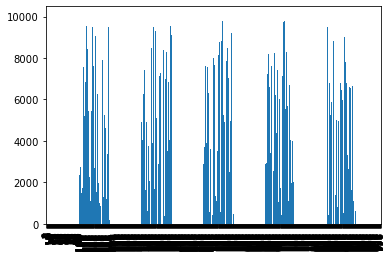

In [10]:
#task 1 : normalising the data 
from sklearn import preprocessing 
#before normalisation
print(data['SomeInt'].plot(kind = 'bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


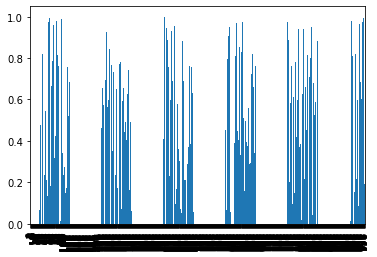

In [11]:
# copy the data
df_min_max_scaled = data.copy()
  
# apply normalization techniques to column 'SomeInt'
column = 'SomeInt'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled['SomeInt'].plot(kind='bar'))

In [16]:
#task 3: applying label encoding to the 'SomeEmail' column 
le = preprocessing.LabelEncoder()
data['SomeEmail'] = le.fit_transform(data['SomeEmail'])
#as you can see the data has been encoded 
data['SomeEmail'].head()

0    0
1    1
2    0
3    1
4    0
Name: SomeEmail, dtype: int64

In [19]:
#task 4: to check if there is skewness in features 
# skewness along the index axis
print(data.skew(axis = 0, skipna = True))
print("as you can see , there is a certain level of skewness but it is not too much")

Id             0.000000
ParentId       0.033804
SomeEmail      0.518188
SomeLat        0.042611
SomeLon        0.003691
SomeInt        0.029198
SomeReal      -0.056753
SomeBoolean    0.006554
dtype: float64
as you can see , there is a certain level of skewness but it is not too much


Text(0.5, 1.0, 'Skewness in ParentId')

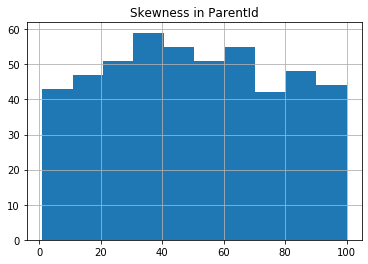

In [30]:
data.ParentId.hist()
plt.title('Skewness in ParentId')

Text(0.5, 1.0, 'Skewness in SomeInt')

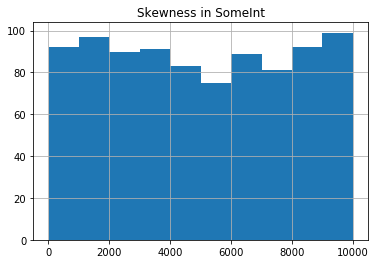

In [31]:
data.SomeInt.hist()
plt.title('Skewness in SomeInt')

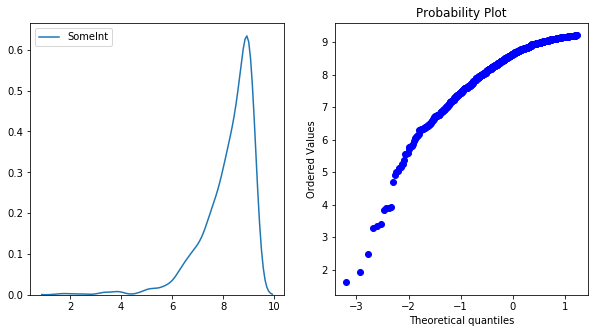

In [32]:
#function to return plots for the feature
#importing necessary libraries
import scipy.stats as stats
import pylab
import seaborn as sns
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

#performing logarithmic transformation on the feature
data['SomeInt']=np.log(data['SomeInt'])
#plotting to check the transformation
normality(data,'SomeInt')


/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


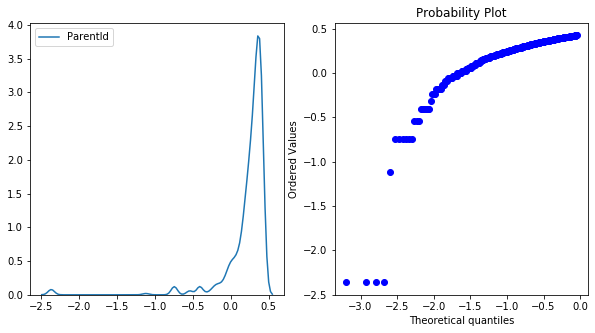

In [35]:
#task 6: using feature engineering wherever necessary 
#normalising all data with large values and are of float datatype

#performing logarithmic transformation on the feature
data['ParentId']=np.log(data['ParentId'])
#plotting to check the transformation
normality(data,'ParentId')


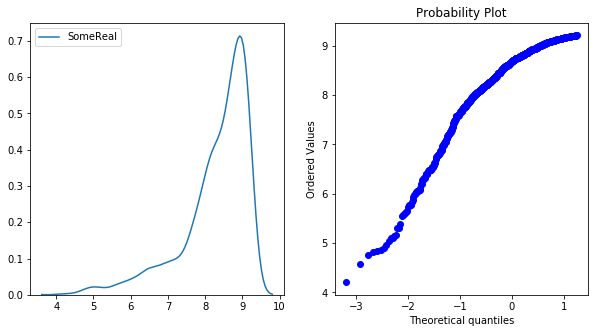

In [36]:
#performing logarithmic transformation on the feature
data['SomeReal']=np.log(data['SomeReal'])
#plotting to check the transformation
normality(data,'SomeReal')
